In [65]:
import pandas as pd
import numpy as np

In [66]:
data=pd.read_csv('TRAIN.csv')

In [67]:
data

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [83]:
data.isnull().sum()

Age                 0
Workclass           0
Education           0
Education_Num       0
Martial_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours_per_week      0
Country           656
Target              0
dtype: int64

In [69]:
data['Target'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [71]:
#data['Target'].str.replace("<=50","0")
data['Target']=data['Target'].str.replace(' <=50K','0')
data['Target']=data['Target'].str.replace(' <=50K.','0')
data['Target']=data['Target'].str.replace(' >50K','1')
data['Target']=data['Target'].str.replace(' >50K.','1')

In [76]:
data['Target'].unique()

array(['0', '1'], dtype=object)

In [75]:
data['Target']=data['Target'].str.replace('1.','1')

In [77]:
data.drop('fnlwgt',axis=1,inplace=True)

In [81]:
data['Workclass'].describe()

count        34448
unique           8
top        Private
freq         25441
Name: Workclass, dtype: object

In [82]:
data['Workclass'].fillna('Private',inplace=True)

In [79]:
data['Country']=data['Country'].dropna()

In [84]:
data=data.dropna()

In [85]:
data.isnull().sum().sum()

0

In [86]:
data1=data
y=data['Target']

In [87]:
x=data1.drop('Target',axis=1)


In [88]:
x=pd.get_dummies(x)

In [90]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [91]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48)

In [184]:
dtree_mod=DecisionTreeClassifier()
dtree_mod.fit(xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [185]:

ypred=dtree_mod.predict(xtest)
ypred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [186]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypred))

Accuracy: 0.8199219475933841


In [187]:
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      8217
           1       0.62      0.60      0.61      2545

   micro avg       0.82      0.82      0.82     10762
   macro avg       0.75      0.75      0.75     10762
weighted avg       0.82      0.82      0.82     10762



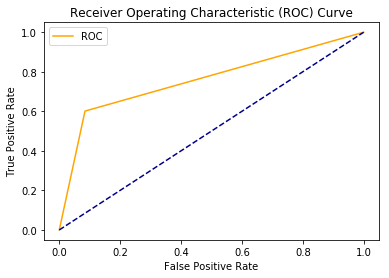

In [188]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
fpr,tpr, thresholds= roc_curve(ytest, pred,pos_label=1)
plot_roc_curve(fpr, tpr)

In [190]:
from sklearn.model_selection import GridSearchCV
hyper_params= [{'max_depth':list(range(5,30))}]
model_cv=GridSearchCV(estimator=dtree_mod,param_grid=hyper_params,verbose=1,return_train_score=True)
model_cv.fit(xtrain,ytrain)

C:\Users\hp user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   13.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [193]:
model_cv.best_score_
model_cv.best_params_

{'max_depth': 8}

In [196]:
dtree_mod=DecisionTreeClassifier(max_depth=8)
dtree_mod.fit(xtrain,ytrain)
ypred=dtree_mod.predict(xtest)

In [197]:
#f1-score, recall has improved with tree depth 8 obtained from Grid search CV
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(ytest, ypred))
from sklearn.metrics import classification_report
from sklearn import metrics
print(classification_report(ytest,ypred))

Accuracy: 0.8556959672923249
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      8217
           1       0.75      0.58      0.65      2545

   micro avg       0.86      0.86      0.86     10762
   macro avg       0.82      0.76      0.78     10762
weighted avg       0.85      0.86      0.85     10762



In [198]:
#Accuracy and recall has improved with random forest classifier
#Recall indicates that correctly true predicted values has improved,due to Random forest
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)
pred=clf.predict(xtest)
print("Accuracy:",metrics.accuracy_score(ytest, pred))
print(classification_report(ytest,pred))

C:\Users\hp user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.842965991451403
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      8217
           1       0.69      0.61      0.65      2545

   micro avg       0.84      0.84      0.84     10762
   macro avg       0.79      0.76      0.77     10762
weighted avg       0.84      0.84      0.84     10762



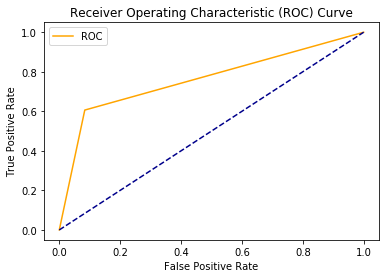

In [199]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
fpr,tpr, thresholds= roc_curve(ytest, pred,pos_label=1)
plot_roc_curve(fpr, tpr)

In [182]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [176]:
ytrain=ytrain.replace('0',0)
ytrain=ytrain.replace('1',1)
